###  Corona vaccine progress 
version 0.90 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-01-02 11:08:04.884438


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,source_name,source_website,vaccines,last_observation_date
0,Argentina,ARG,Government of Argentina,https://www.argentina.gob.ar/sites/default/fil...,Sputnik V,2020-12-31
1,Austria,AUT,Federal Ministry for Social Affairs and Health,https://www.sozialministerium.at/Informationen...,Pfizer/BioNTech,2020-12-30
2,Bahrain,BHR,Ministry of Health,https://twitter.com/MOH_Bahrain,Sinopharm,2021-01-01
3,Bulgaria,BGR,Ministry of Health,https://coronavirus.bg/bg/statistika,Pfizer/BioNTech,2021-01-01
4,Canada,CAN,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada,Pfizer/BioNTech,2021-01-01
5,Chile,CHL,Department of Statistics and Health Information,https://deis.minsal.cl/,Pfizer/BioNTech,2020-12-27
6,China,CHN,National Health Commission,https://www.globaltimes.cn/page/202012/1211515...,"CNBG, Sinovac",2020-12-31
7,Costa Rica,CRI,Government of Costa Rica,https://www.presidencia.go.cr/comunicados/2020...,Pfizer/BioNTech,2020-12-24
8,Croatia,HRV,Ministry of Health,https://vlada.gov.hr/news/government-approves-...,Pfizer/BioNTech,2020-12-30
9,Denmark,DNK,Statens Serum Institut,https://covid19.ssi.dk/overvagningsdata/vaccin...,Pfizer/BioNTech,2020-12-31


In [5]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:15]

,location,date,vaccine,total_vaccinations,source_url,iso_code,source_name,source_website,vaccines,last_observation_date,_merge
15,Bulgaria,2021-01-01,Pfizer/BioNTech,4739,https://coronavirus.bg/bg/statistika,BGR,Ministry of Health,https://coronavirus.bg/bg/statistika,Pfizer/BioNTech,2021-01-01,both
101,Oman,2021-01-01,Pfizer/BioNTech,6516,https://twitter.com/OmaniMOH/status/1344938163...,OMN,Ministry of Health,https://twitter.com/OmaniMOH/status/1344938163...,Pfizer/BioNTech,2021-01-01,both
54,Estonia,2021-01-01,Pfizer/BioNTech,2487,https://www.terviseamet.ee/et/uudised/covid-19...,EST,National Health Board,https://www.terviseamet.ee/et/uudised/covid-19...,Pfizer/BioNTech,2021-01-01,both
81,Israel,2021-01-01,Pfizer/BioNTech,1000000,https://twitter.com/YuliEdelstein/status/13449...,ISR,Government of Israel,https://twitter.com/YuliEdelstein/status/13449...,Pfizer/BioNTech,2021-01-01,both
119,United Kingdom,2021-01-01,Pfizer/BioNTech,1000000,https://twitter.com/MattHancock/status/1344987...,GBR,Government of the United Kingdom,https://twitter.com/MattHancock/status/1344987...,Pfizer/BioNTech,2021-01-01,both
111,Romania,2021-01-01,Pfizer/BioNTech,11656,https://vaccinare-covid.gov.ro/actualizare-zil...,ROU,Government of Romania,https://vaccinare-covid.gov.ro/comunicate-ofic...,Pfizer/BioNTech,2021-01-01,both
34,Canada,2021-01-01,Pfizer/BioNTech,108253,https://github.com/ishaberry/Covid19Canada/blo...,CAN,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada,Pfizer/BioNTech,2021-01-01,both
85,Italy,2021-01-01,Pfizer/BioNTech,45667,https://bit.ly/vaccini_covid19,ITA,Commissioner for the COVID-19 emergency,https://bit.ly/vaccini_covid19,Pfizer/BioNTech,2021-01-01,both
12,Bahrain,2021-01-01,Sinopharm,59351,https://twitter.com/MOH_Bahrain/status/1345086...,BHR,Ministry of Health,https://twitter.com/MOH_Bahrain,Sinopharm,2021-01-01,both
33,Canada,2020-12-31,Pfizer/BioNTech,99946,https://github.com/ishaberry/Covid19Canada/blo...,CAN,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada,Pfizer/BioNTech,2021-01-01,both


In [6]:
#Countries in list
allCountries["location"].value_counts()

Canada              19
Israel              13
Bahrain             10
United States        7
Estonia              5
Denmark              5
Mexico               5
Germany              5
Poland               4
Chile                4
Oman                 4
Romania              4
Italy                4
Hungary              4
Northern Ireland     3
Scotland             3
Bulgaria             3
United Kingdom       3
Wales                3
Portugal             2
Russia               2
England              2
China                2
Argentina            2
Ireland              1
Greece               1
Croatia              1
Luxembourg           1
Latvia               1
France               1
Finland              1
Kuwait               1
Lithuania            1
Costa Rica           1
Austria              1
Iceland              1
Name: location, dtype: int64

In [7]:
allCountries.groupby(["location", "vaccine"]).size()

location          vaccine                 
Argentina         Sputnik V                    2
Austria           Pfizer/BioNTech              1
Bahrain           Sinopharm                   10
Bulgaria          Pfizer/BioNTech              3
Canada            Pfizer/BioNTech             19
Chile             Pfizer/BioNTech              4
China             CNBG, Sinovac                2
Costa Rica        Pfizer/BioNTech              1
Croatia           Pfizer/BioNTech              1
Denmark           Pfizer/BioNTech              5
England           Pfizer/BioNTech              2
Estonia           Pfizer/BioNTech              5
Finland           Pfizer/BioNTech              1
France            Pfizer/BioNTech              1
Germany           Pfizer/BioNTech              5
Greece            Pfizer/BioNTech              1
Hungary           Pfizer/BioNTech              4
Iceland           Pfizer/BioNTech              1
Ireland           Pfizer/BioNTech              1
Israel            Pfizer/B

In [8]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 126
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   location               119 non-null    object        
 1   date                   119 non-null    datetime64[ns]
 2   vaccine                119 non-null    object        
 3   total_vaccinations     119 non-null    int64         
 4   source_url             119 non-null    object        
 5   iso_code               119 non-null    object        
 6   source_name            119 non-null    object        
 7   source_website         119 non-null    object        
 8   vaccines               119 non-null    object        
 9   last_observation_date  119 non-null    object        
 10  _merge                 119 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1), object(8)
memory usage: 10.4+ KB


In [9]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape)


9 946 190 (32, 3)


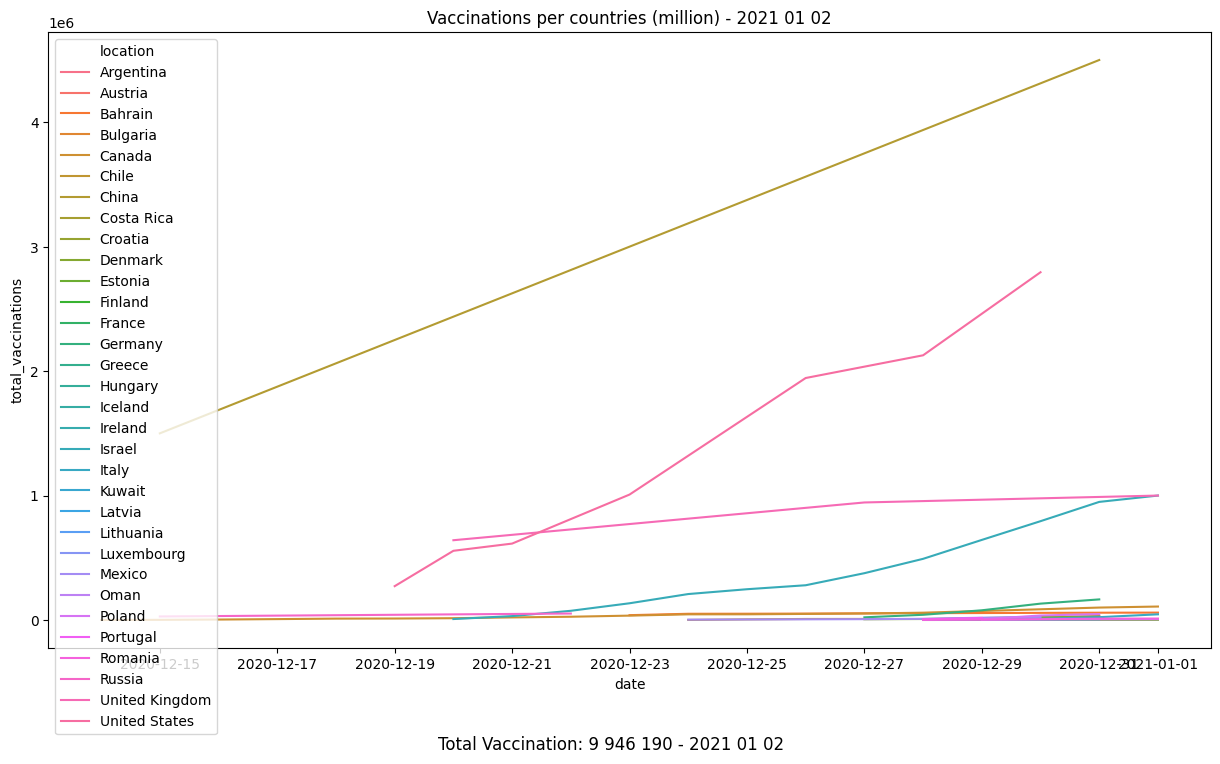

In [10]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str  + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


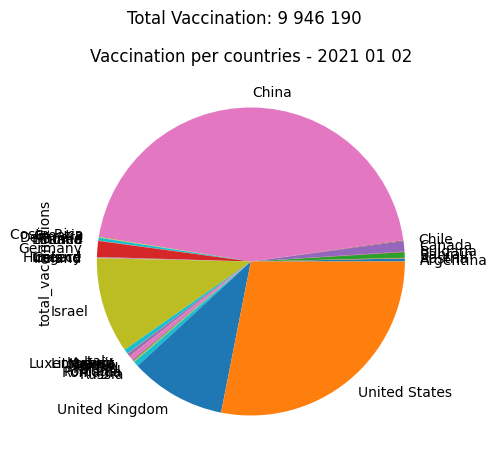

In [11]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [12]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,vaccine,iso_code
location,,,
China,4500000,"CNBG, Sinovac",CHN
United States,2794588,"Moderna, Pfizer/BioNTech",USA
United Kingdom,1000000,Pfizer/BioNTech,GBR
Israel,1000000,Pfizer/BioNTech,ISR
Germany,165575,Pfizer/BioNTech,DEU
Canada,108253,Pfizer/BioNTech,CAN
Bahrain,59351,Sinopharm,BHR
Russia,52000,Sputnik V,RUS
Poland,47600,Pfizer/BioNTech,POL


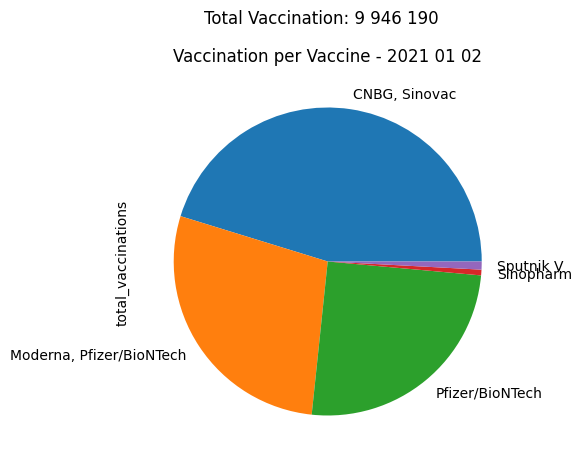

In [13]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [14]:
plotVaccine.sort_values(ascending=True)

vaccine
Sinopharm                     59351
Sputnik V                     84013
Pfizer/BioNTech             2508238
Moderna, Pfizer/BioNTech    2794588
CNBG, Sinovac               4500000
Name: total_vaccinations, dtype: int64

In [15]:
# Sweden have 10 000 doses....
#allCountries

In [16]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-02 11:08:18.092662
Time elapsed (hh:mm:ss.ms) 0:00:13.209148


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [17]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sp8
# see also https://www.wikidata.org/wiki/Wikidata:Project_chat#Brexit_in_Wikidata
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita
?G20 ?IMF (sample(?genderH) AS ?genderH)
WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1 }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita }
  ?cid wdt:P6/wdt:P21 ?gHead # gender head of gov
  BIND (exists{?cid wdt:P463 wd:Q458} && not exists{?cid p:P463 [ ps:P463 wd:Q458 ; pq:P582 [] ]} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q19771} && not exists{?cid p:P463 [ ps:P463 wd:Q19771 ; pq:P582 [] ]} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q7804} && not exists{?cid p:P463 [ ps:P463 wd:Q7804 ; pq:P582 [] ]} AS ?IMF)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
    ?gHead rdfs:label ?genderH.
    FILTER((LANG(?genderH)) = "en")

  }
FILTER ( ?cid  not in ( wd:Q756617 ) ) #Danish Realm
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid 
 ?G20 ?IMF """


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cid                  194 non-null    object
 1   continent            194 non-null    object
 2   memberEU             194 non-null    object
 3   country              194 non-null    object
 4   qid                  194 non-null    object
 5   population           194 non-null    object
 6   ISO3166_1            194 non-null    object
 7   nominalGDPperCapita  191 non-null    object
 8   G20                  194 non-null    object
 9   IMF                  194 non-null    object
 10  genderH              194 non-null    object
dtypes: object(11)
memory usage: 16.8+ KB


In [18]:
WDpopulation.sample(5)

,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH
60,http://www.wikidata.org/entity/Q115,Africa,false,Ethiopia,Q115,104957438,ETH,767,false,false,male
64,http://www.wikidata.org/entity/Q711,Asia,false,Mongolia,Q711,3075647,MNG,3717,false,false,male
97,http://www.wikidata.org/entity/Q1020,Africa,false,Malawi,Q1020,18622104,MWI,338,false,false,male
7,http://www.wikidata.org/entity/Q1009,Africa,false,Cameroon,Q1009,24053727,CMR,1451,false,false,male
14,http://www.wikidata.org/entity/Q858,Asia,false,Syria,Q858,18269868,SYR,2058,false,false,male


In [19]:
plotLatestCountries

,total_vaccinations,vaccine,iso_code
location,,,
Argentina,32013,Sputnik V,ARG
Austria,6000,Pfizer/BioNTech,AUT
Bahrain,59351,Sinopharm,BHR
Bulgaria,4739,Pfizer/BioNTech,BGR
Canada,108253,Pfizer/BioNTech,CAN
Chile,8648,Pfizer/BioNTech,CHL
China,4500000,"CNBG, Sinovac",CHN
Costa Rica,55,Pfizer/BioNTech,CRI
Croatia,7864,Pfizer/BioNTech,HRV


In [20]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,vaccine,iso_code,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH,_merge
0,32013,Sputnik V,ARG,http://www.wikidata.org/entity/Q414,South America,false,Argentina,Q414,44938712,ARG,14398,true,false,male,both
1,6000,Pfizer/BioNTech,AUT,http://www.wikidata.org/entity/Q40,Europe,true,Austria,Q40,8809212,AUT,44920,false,false,male,both
2,59351,Sinopharm,BHR,http://www.wikidata.org/entity/Q398,Asia,false,Bahrain,Q398,1492584,BHR,23739,false,false,male,both
3,4739,Pfizer/BioNTech,BGR,http://www.wikidata.org/entity/Q219,Europe,true,Bulgaria,Q219,7000039,BGR,8228,false,false,male,both
4,108253,Pfizer/BioNTech,CAN,http://www.wikidata.org/entity/Q16,North America,false,Canada,Q16,37894799,CAN,44870,true,false,male,both
5,8648,Pfizer/BioNTech,CHL,http://www.wikidata.org/entity/Q298,South America,false,Chile,Q298,18054726,CHL,15346,false,false,male,both
6,4500000,"CNBG, Sinovac",CHN,http://www.wikidata.org/entity/Q148,Asia,false,People's Republic of China,Q148,1409517397,CHN,8826,true,false,male,both
7,55,Pfizer/BioNTech,CRI,http://www.wikidata.org/entity/Q800,North America,false,Costa Rica,Q800,4905769,CRI,11677,false,false,male,both
8,7864,Pfizer/BioNTech,HRV,http://www.wikidata.org/entity/Q224,Europe,true,Croatia,Q224,4105493,HRV,13386,false,false,male,both
9,29483,Pfizer/BioNTech,DNK,http://www.wikidata.org/entity/Q35,Europe,true,Denmark,Q35,5827463,DNK,57218,false,false,female,both


In [21]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
# G20 IMF
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)
CountriesData['genderFlag'] = CountriesData['genderH']
CountriesData["genderFlag"].replace({"male": "1", "female": "0"}, inplace=True)
CountriesData['genderFlag'] = CountriesData['genderFlag'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   total_vaccinations   32 non-null     int64   
 1   vaccine              32 non-null     object  
 2   iso_code             32 non-null     object  
 3   cid                  32 non-null     object  
 4   continent            32 non-null     object  
 5   memberEU             32 non-null     int64   
 6   country              32 non-null     object  
 7   qid                  32 non-null     object  
 8   population           32 non-null     int64   
 9   ISO3166_1            32 non-null     object  
 10  nominalGDPperCapita  32 non-null     float64 
 11  G20                  32 non-null     int64   
 12  IMF                  32 non-null     int64   
 13  genderH              32 non-null     object  
 14  _merge               32 non-null     category
 15  genderFlag           32 n

In [22]:
#CountriesData

In [23]:
CountriesData['Country'] = CountriesData.index

In [24]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                          -0.359375
population                         0.904985
nominalGDPperCapita                0.005221
G20                                0.411969
IMF                               -0.078591
genderFlag                         0.126453
Country                            0.059342
vaccinations_population_percent    0.168818
Name: total_vaccinations, dtype: float64

In [25]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.168818
memberEU                          -0.320500
population                        -0.046743
nominalGDPperCapita                0.131154
G20                               -0.115698
IMF                               -0.088097
genderFlag                         0.052381
Country                            0.003241
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [26]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


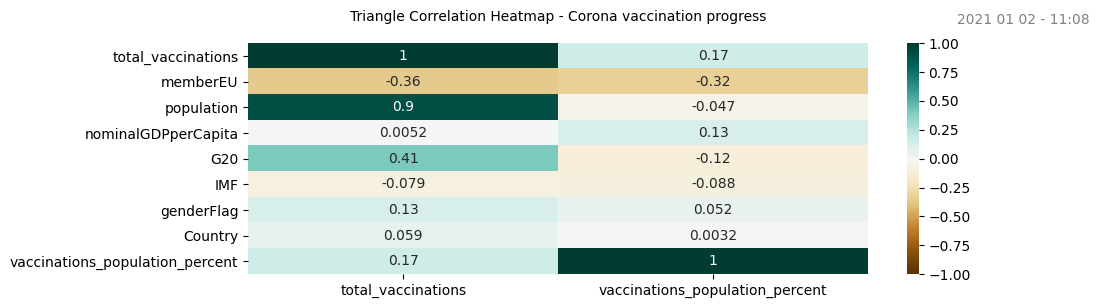

In [27]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [28]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G20","IMF","country"}]

,total_vaccinations,G20,IMF,continent,country,memberEU,vaccinations_population_percent,population
18,1000000,0,0,Asia,Israel,0,10.997471,9093000
2,59351,0,0,Asia,Bahrain,0,3.976393,1492584
30,1000000,1,0,Europe,United Kingdom,0,1.514640,66022273
16,4875,0,0,Europe,Iceland,0,1.365355,357050
31,2794588,1,0,North America,United States of America,0,0.851387,328239523
9,29483,0,0,Europe,Denmark,1,0.505932,5827463
6,4500000,1,0,Asia,People's Republic of China,0,0.319258,1409517397
4,108253,1,0,North America,Canada,0,0.285667,37894799
13,165575,1,1,Europe,Germany,1,0.199130,83149300
23,1200,0,0,Europe,Luxembourg,1,0.191660,626108


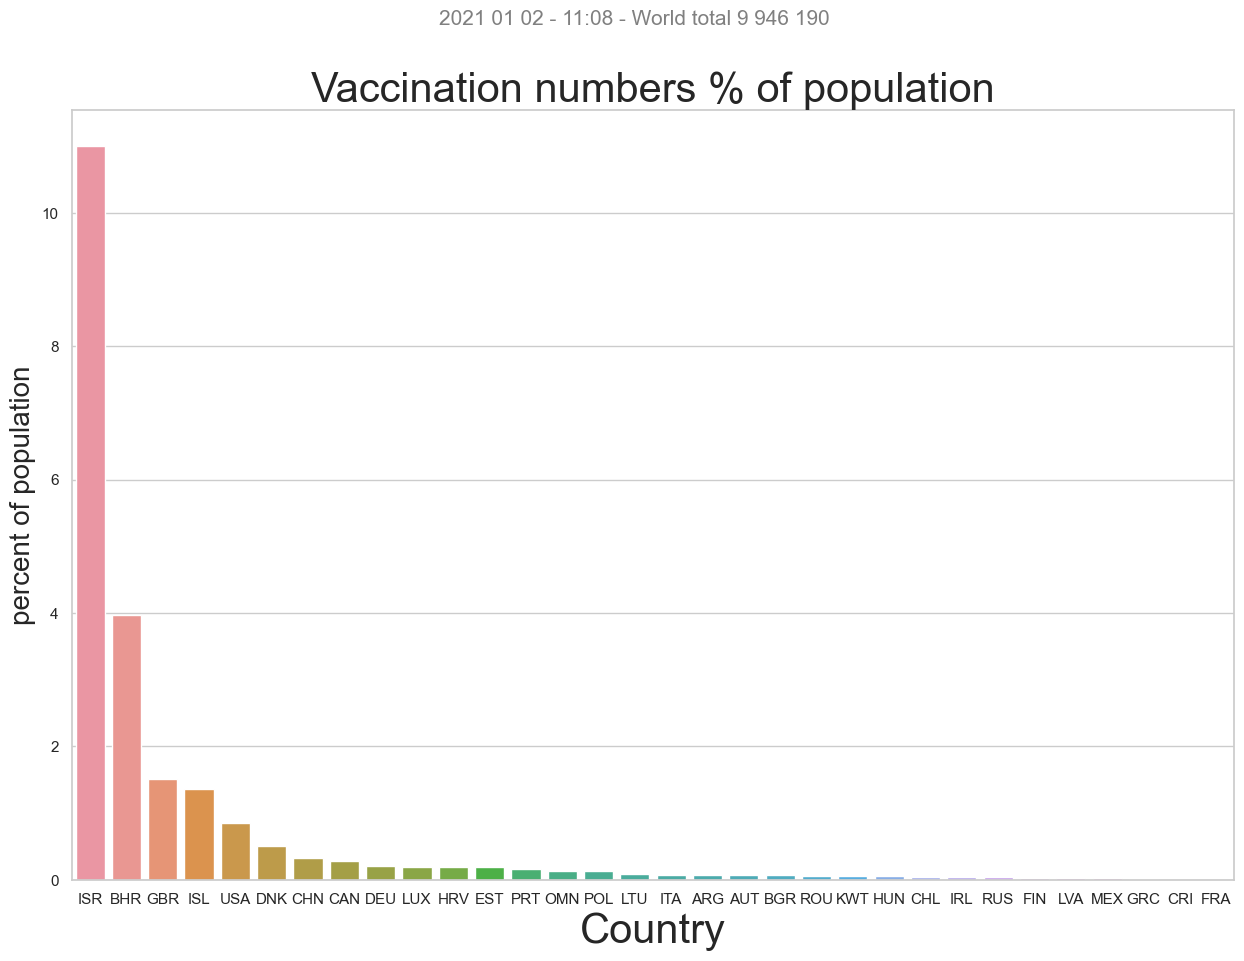

In [29]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

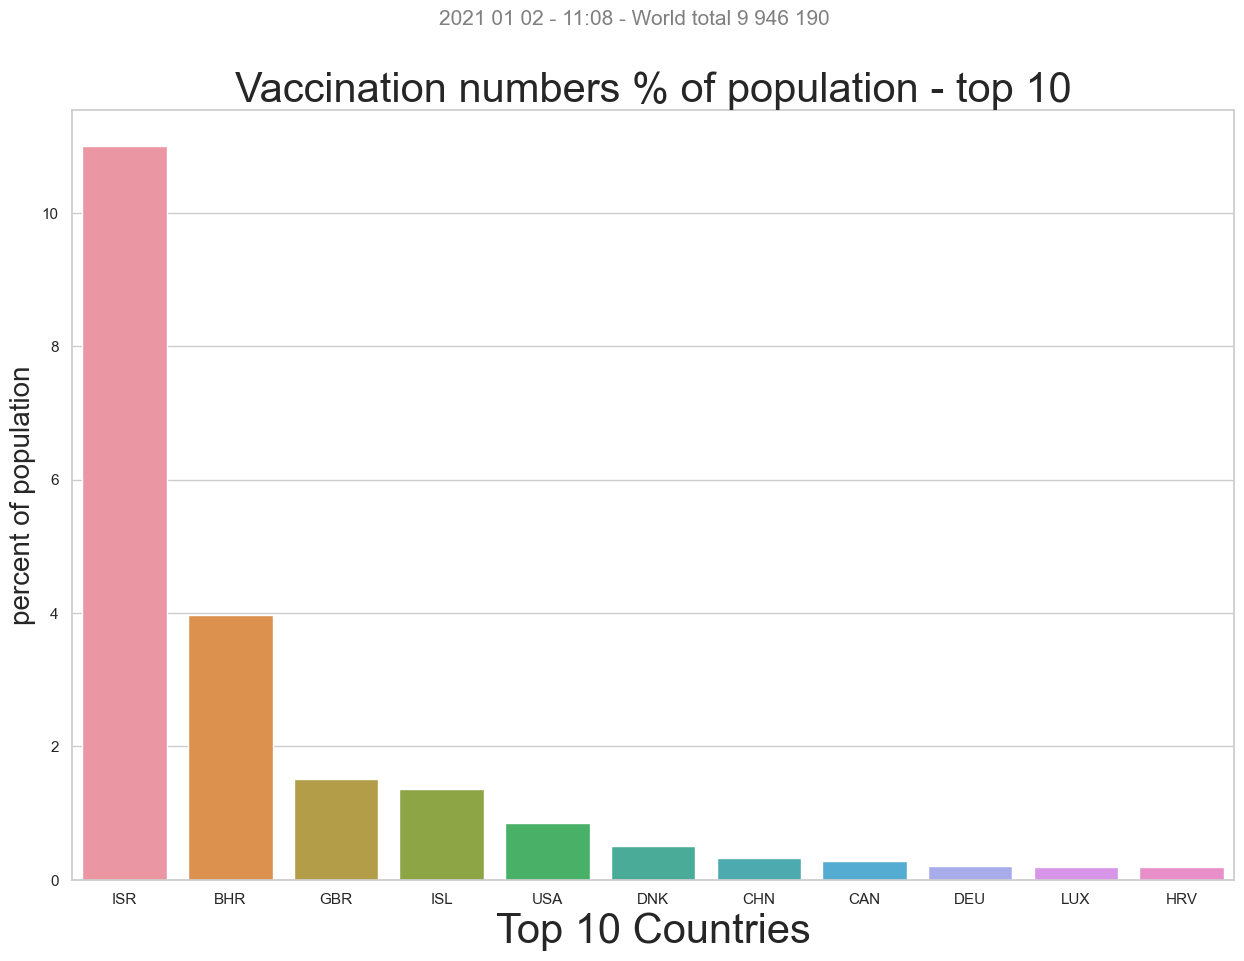

In [30]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:11]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

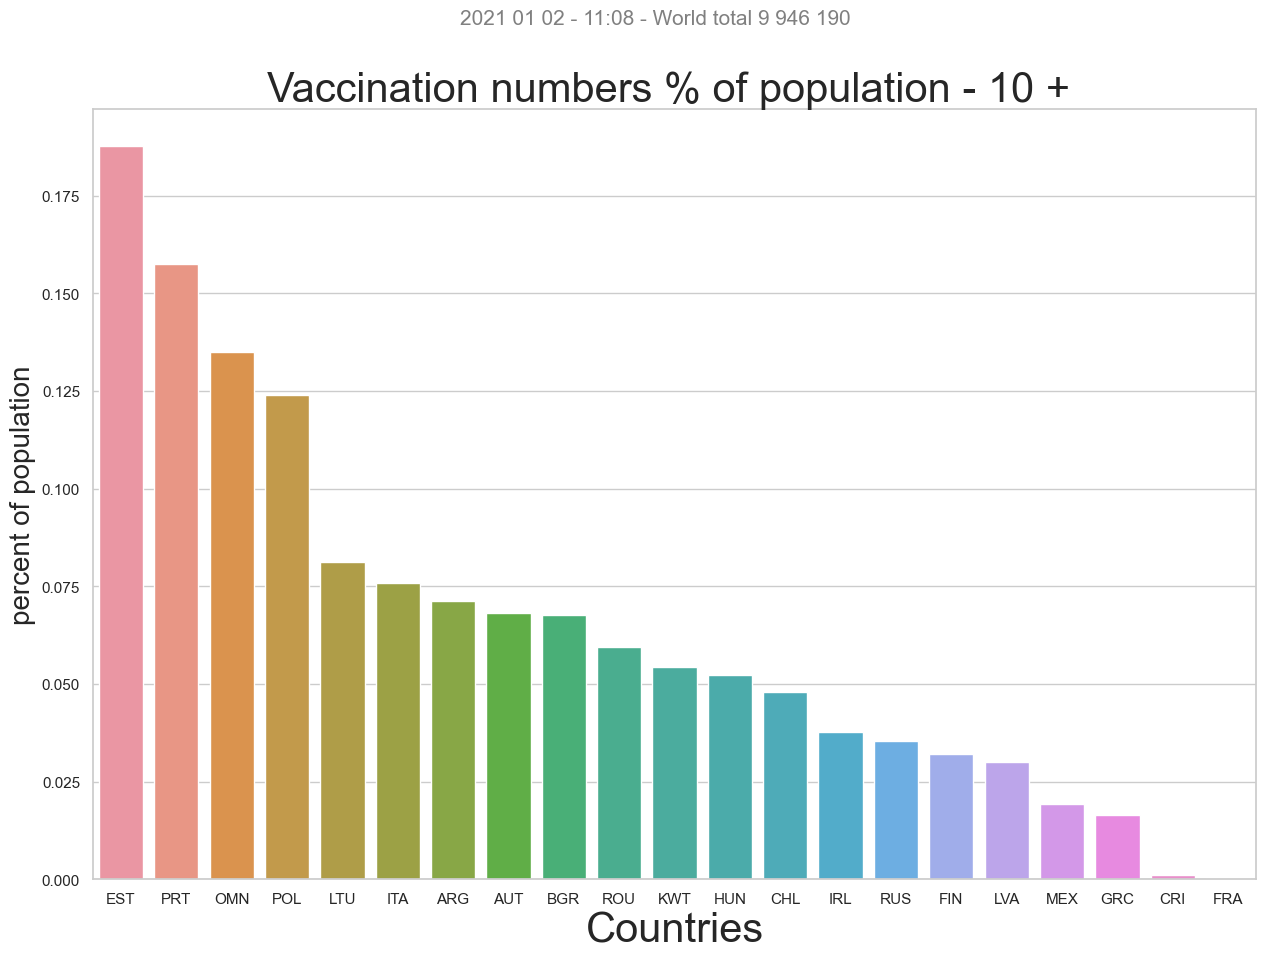

In [31]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[11:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

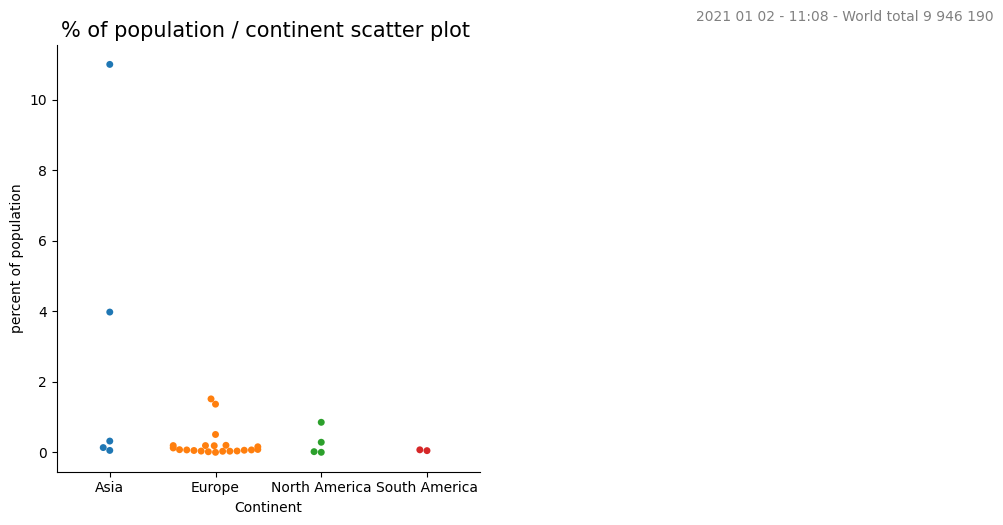

In [32]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

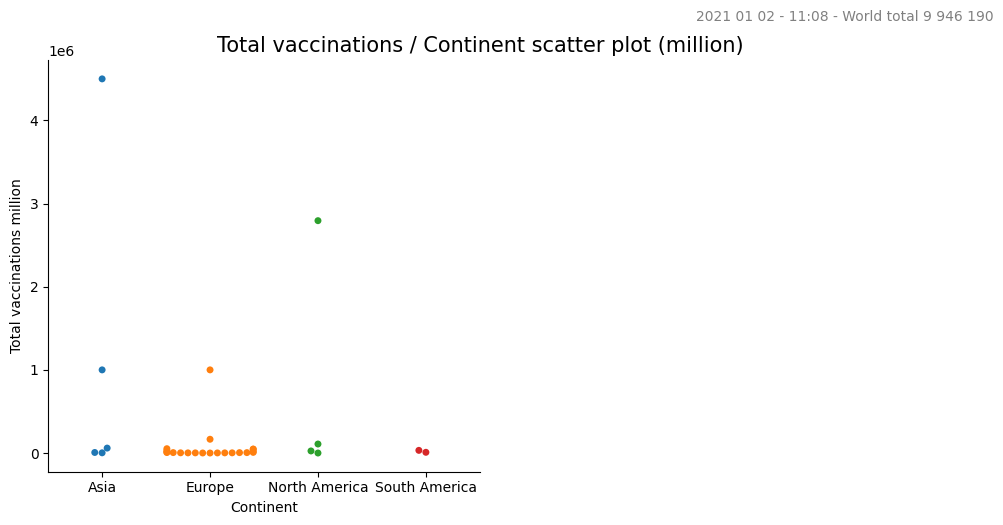

In [33]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [34]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

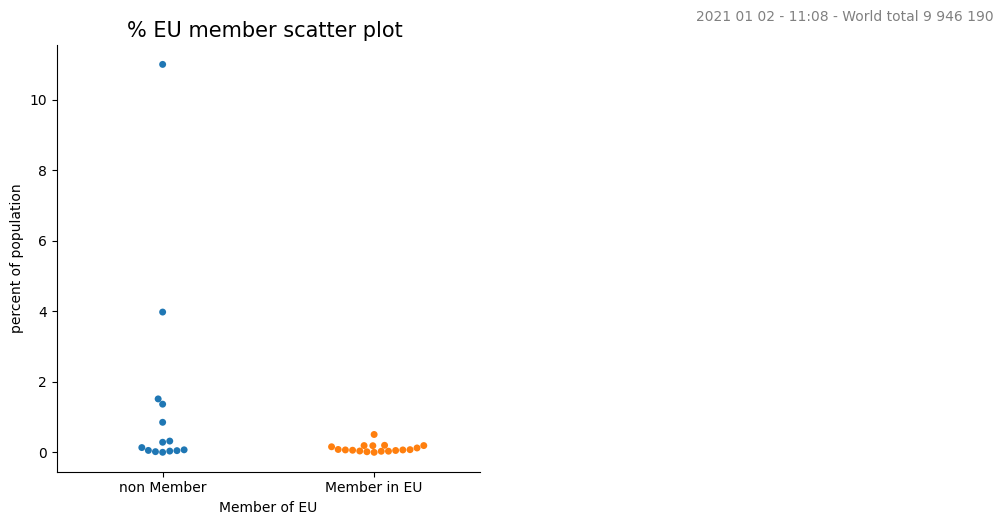

In [35]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

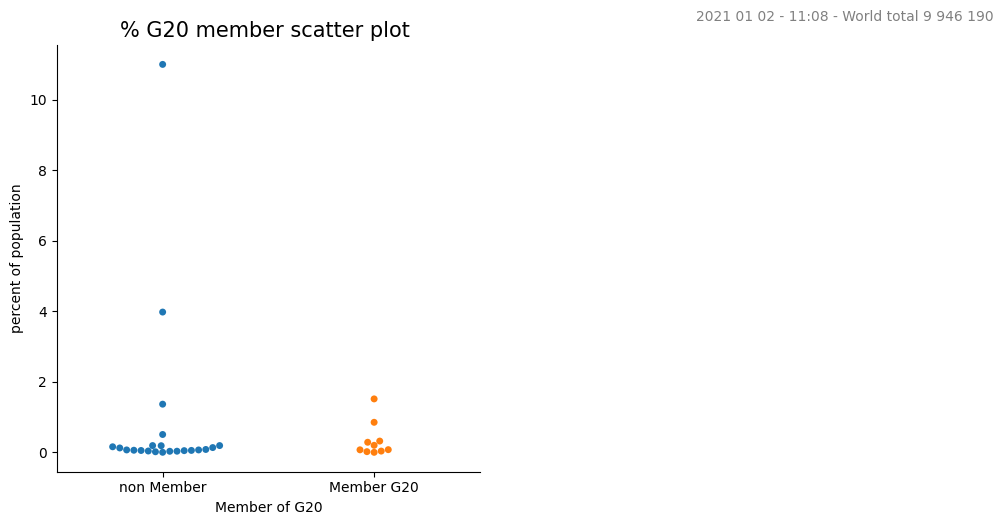

In [36]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

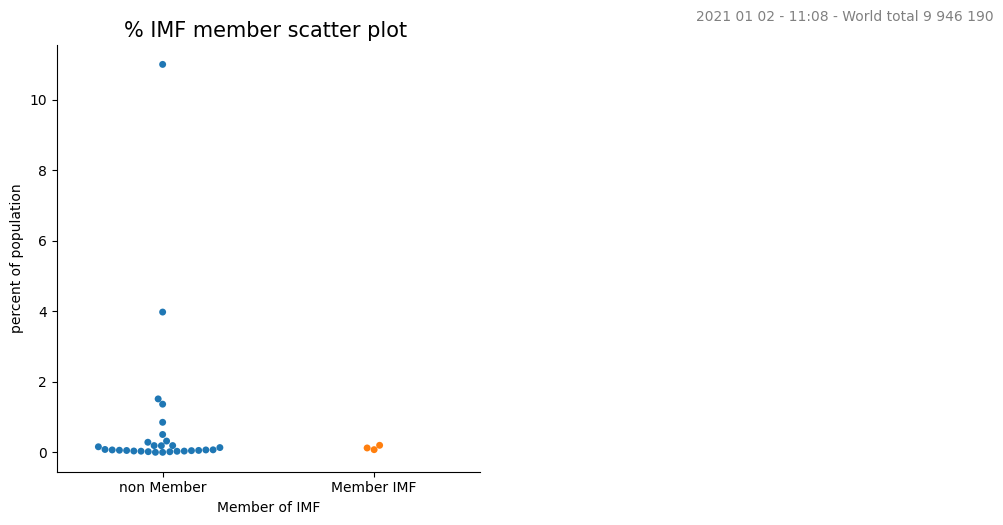

In [37]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [38]:
CountriesDataEurope = CountriesData[CountriesData["continent"] == "Europe"]
europetotal_vaccinations_str = europetotal_vaccinations_str = '{:,}'.format(CountriesDataEurope.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape,europetotal_vaccinations_str)


9 946 190 (32, 3) 1 409 268


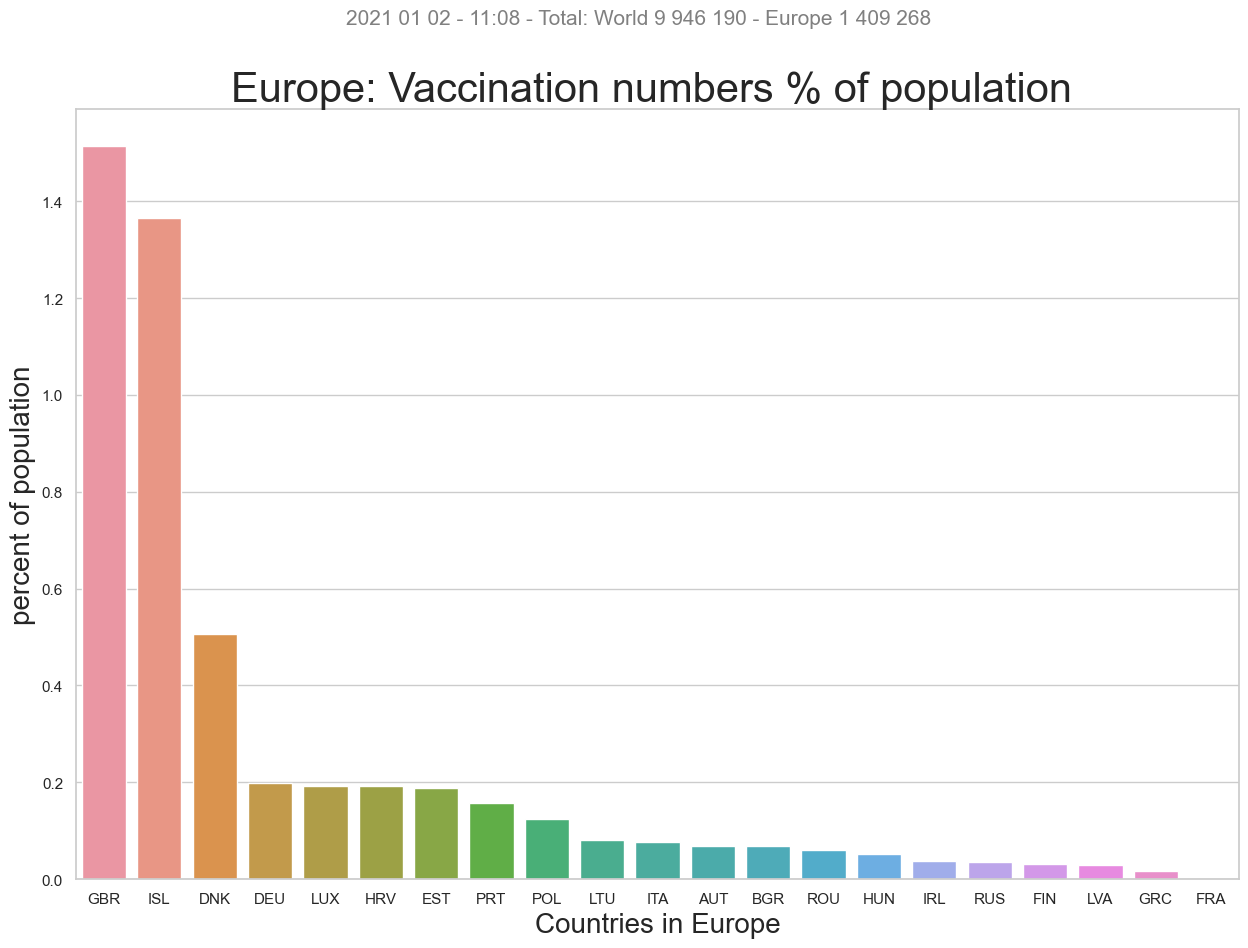

In [39]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesDataEurope). \
            set_title("Europe: Vaccination numbers % of population ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountryPopulation.png",bbox_inches="tight")
plt.show() 

In [40]:
#CountriesDataEurope

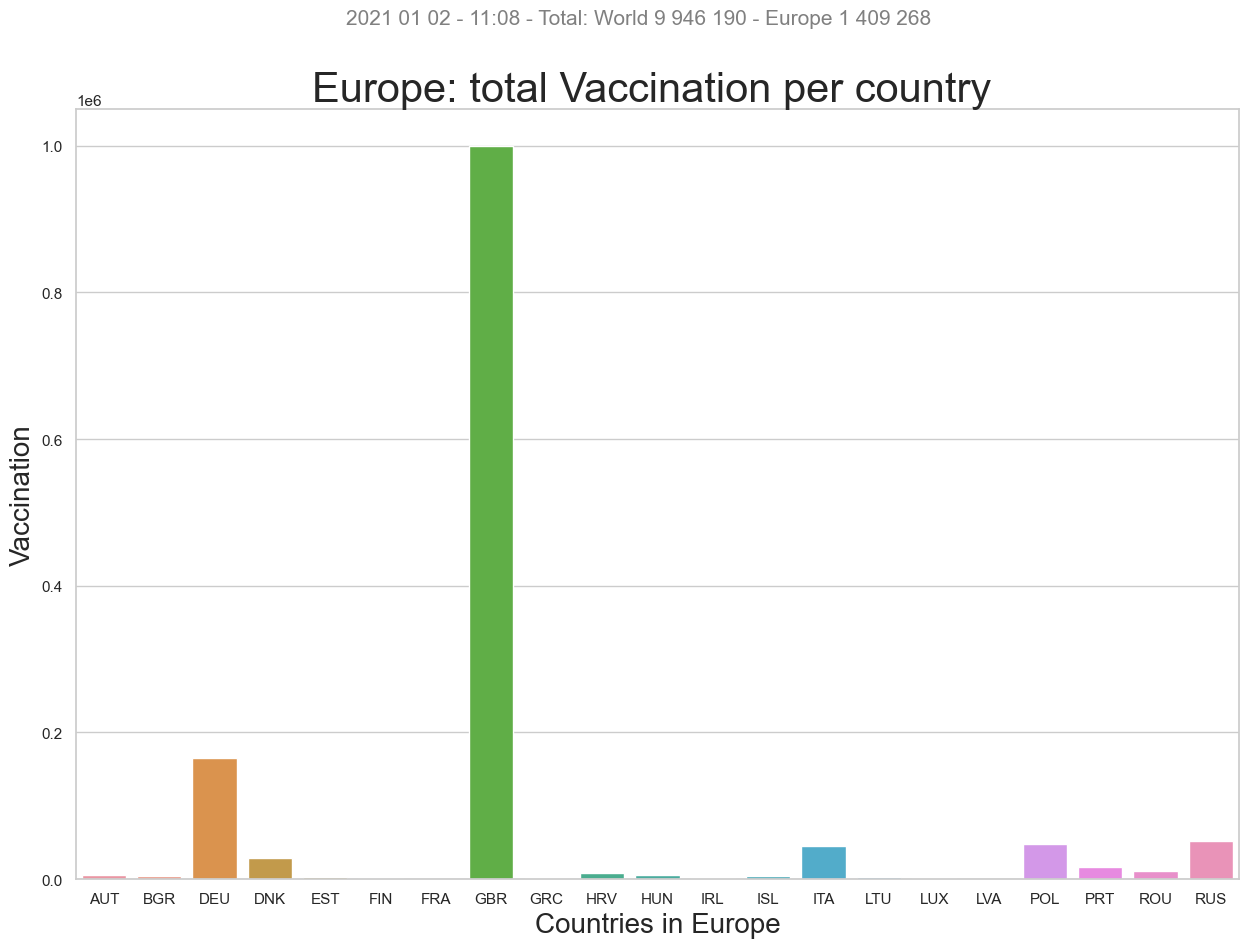

In [41]:
CountriesDataEurope = CountriesDataEurope.sort_values(by=['iso_code'],ascending=True)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEurope). \
            set_title("Europe: total Vaccination per country ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [42]:
#All countries Europe also no reporting
WDpopulationEurope = WDpopulation[WDpopulation["continent"] == "Europe"]
 
#CountriesDataEuropeAll = CountriesDataEurope
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1")  
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1") \
        [{"memberEU_x","country_x","ISO3166_1","total_vaccinations","vaccinations_population_percent","genderH_x"}]

CountriesDataEuropeAll['total_vaccinations'] = CountriesDataEuropeAll['total_vaccinations'].fillna(0)
CountriesDataEuropeAll['vaccinations_population_percent'] = CountriesDataEuropeAll['vaccinations_population_percent'].fillna(0)
CountriesDataEuropeAll = CountriesDataEuropeAll.sort_values(by=['ISO3166_1'],ascending=True)
#CountriesDataEuropeAll["Member EU"] = CountriesDataEuropeAll["Member EU"].fillna("non Member")
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll.rename(columns = {'memberEU_x': 'memberEU'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'genderH_x': 'head_gender'}, inplace = True)
# name change 
CountriesDataEuropeAll
#CountriesDataEurope
#WDpopulationEurope 
#CountriesDataEurope

,country_x,total_vaccinations,ISO3166_1,vaccinations_population_percent,memberEU,head_gender
13,Albania,0.0,ALB,0.000000,non Member,male
37,Andorra,0.0,AND,0.000000,non Member,male
2,Armenia,0.0,ARM,0.000000,non Member,male
35,Austria,6000.0,AUT,0.068111,Member in EU,male
6,Azerbaijan,0.0,AZE,0.000000,non Member,male
1,Belgium,0.0,BEL,0.000000,Member in EU,male
49,Bulgaria,4739.0,BGR,0.067700,Member in EU,male
9,Bosnia and Herzegovina,0.0,BIH,0.000000,non Member,male
16,Belarus,0.0,BLR,0.000000,non Member,male
30,Switzerland,0.0,CHE,0.000000,non Member,male


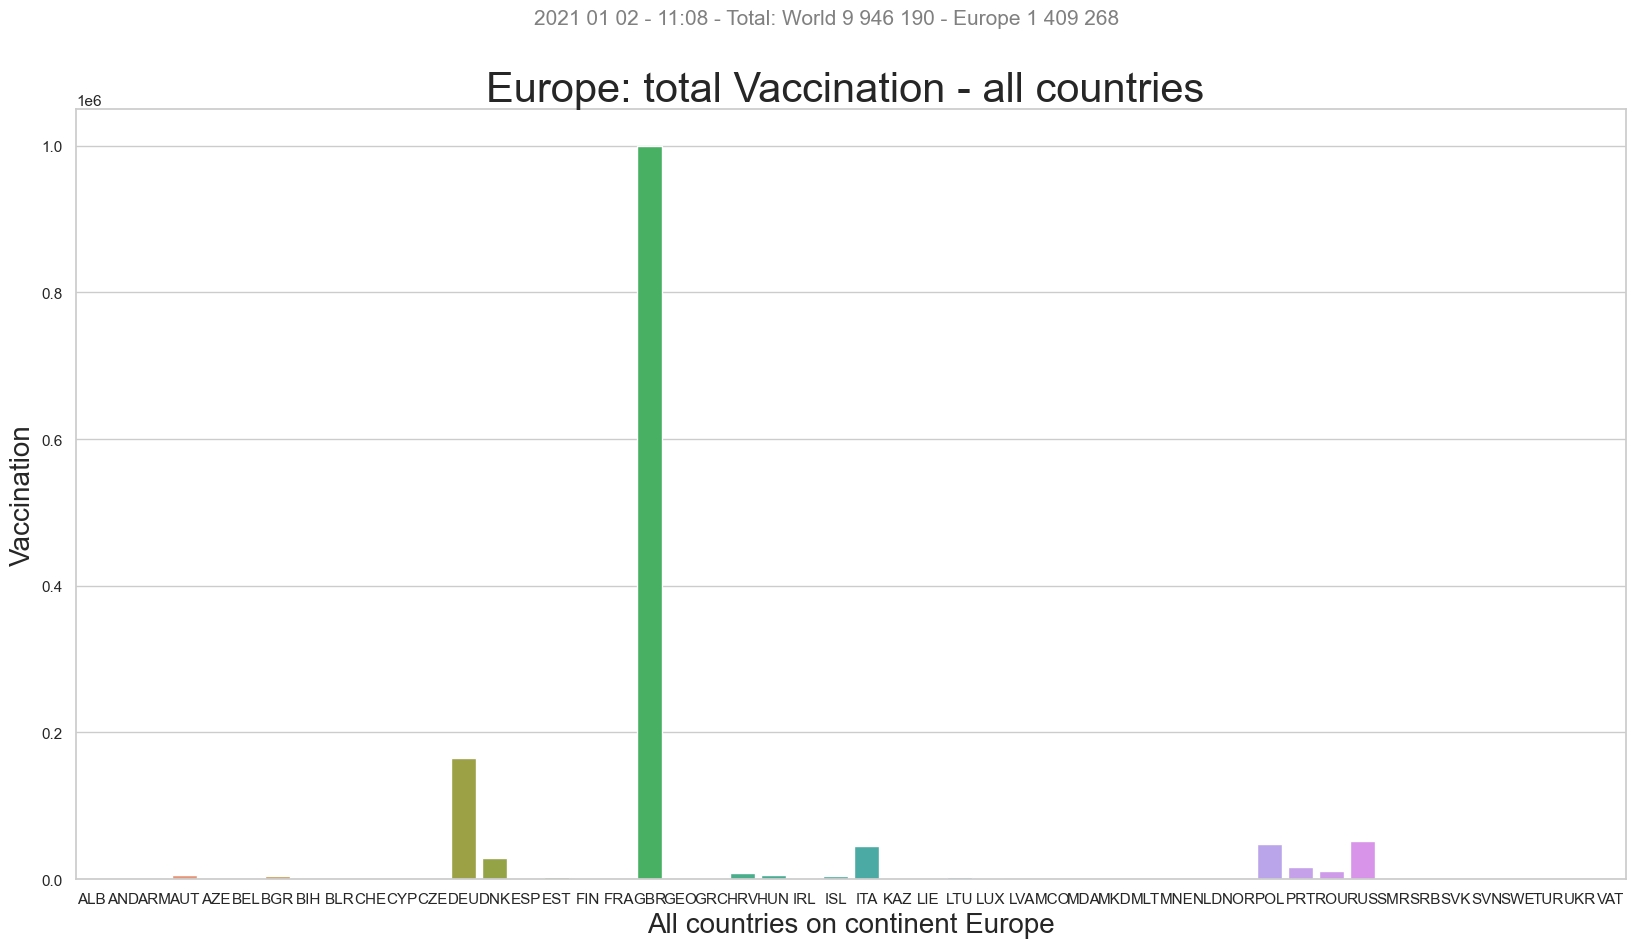

In [43]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEuropeAll). \
            set_title("Europe: total Vaccination - all countries ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All countries on continent Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/Corona_EuropeAllVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [44]:
CountriesDataEuropeAll

,country_x,total_vaccinations,ISO3166_1,vaccinations_population_percent,memberEU,head_gender
13,Albania,0.0,ALB,0.000000,non Member,male
37,Andorra,0.0,AND,0.000000,non Member,male
2,Armenia,0.0,ARM,0.000000,non Member,male
35,Austria,6000.0,AUT,0.068111,Member in EU,male
6,Azerbaijan,0.0,AZE,0.000000,non Member,male
1,Belgium,0.0,BEL,0.000000,Member in EU,male
49,Bulgaria,4739.0,BGR,0.067700,Member in EU,male
9,Bosnia and Herzegovina,0.0,BIH,0.000000,non Member,male
16,Belarus,0.0,BLR,0.000000,non Member,male
30,Switzerland,0.0,CHE,0.000000,non Member,male


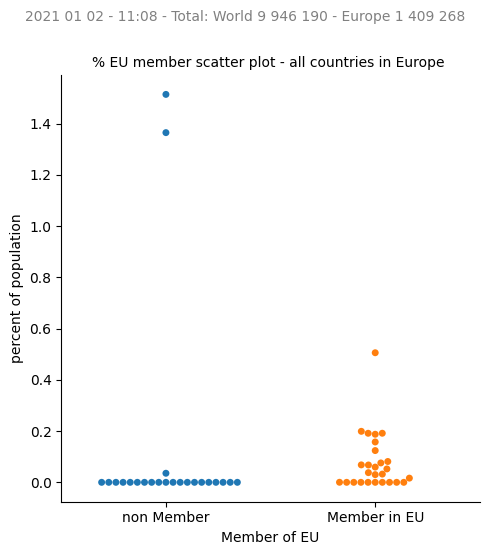

In [45]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="memberEU", y="vaccinations_population_percent", data=CountriesDataEuropeAll,kind="swarm",legend='brief')
plt.title("% EU member scatter plot - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_VaccinationperPopulation_AllEurope_scatterplot.png",bbox_inches="tight")
plt.show() 

In [46]:
#CountriesDataEuropeAll["head_gender"].astype('string')  
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 13 to 39
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_x                        50 non-null     object 
 1   total_vaccinations               50 non-null     float64
 2   ISO3166_1                        50 non-null     object 
 3   vaccinations_population_percent  50 non-null     float64
 4   memberEU                         50 non-null     object 
 5   head_gender                      50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [47]:
#CountriesDataEuropeAll["vaccinations_population_percent].value_counts()

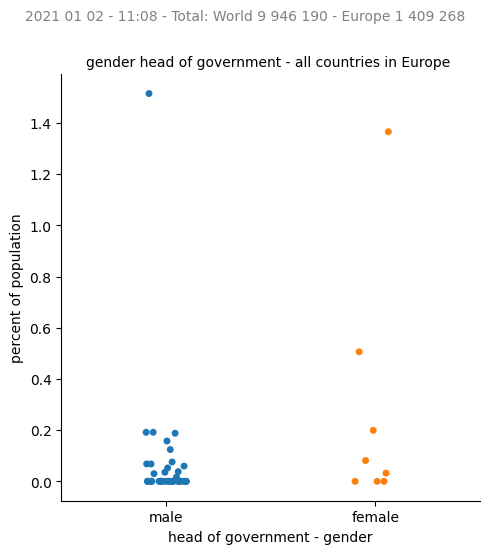

In [48]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="vaccinations_population_percent", data=CountriesDataEuropeAll)
plt.title("gender head of government - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_percent_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

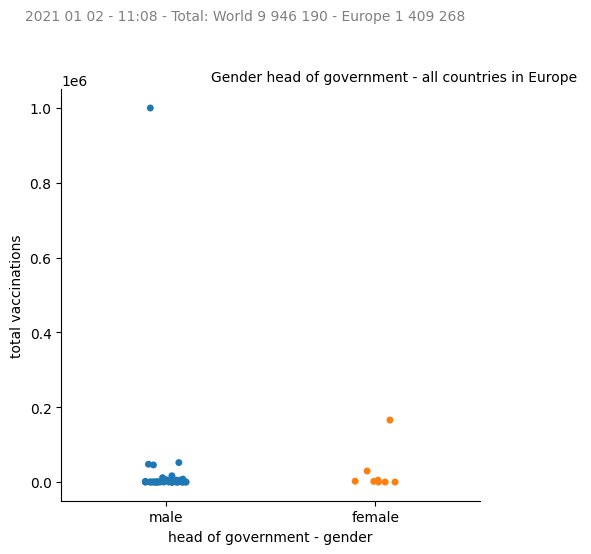

In [49]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="total_vaccinations", data=CountriesDataEuropeAll)
plt.title("Gender head of government - all countries in Europe ",fontsize=10,x=0.8)
plt.ylabel("total vaccinations",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

In [50]:
print(worldtotal_vaccinations_str, plotLatestCountries.shape, europetotal_vaccinations_str, CountriesDataEurope.shape)

9 946 190 (32, 3) 1 409 268 (21, 21)


In [51]:
end = datetime.now()
print("Ended:a ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:a  2021-01-02 11:08:36.671821
Time elapsed (hh:mm:ss.ms) 0:00:31.787757


In [52]:
#The Global State of Democracy Indices
stata_democracy_indices = "https://www.idea.int/gsod-indices/sites/default/files/gsodi_pv_4.dta"
df = pd.read_stata(stata_democracy_indices)

In [53]:
df.sample(10)

,ID,ID_country_name,ID_country_code,ID_year,ID_country_year,ID_region,ID_subregion,C_A1,L_A1,U_A1,C_SD11,L_SD11,U_SD11,C_SD12,C_SD13,L_SD13,U_SD13,C_SD14,L_SD14,U_SD14,C_A2,L_A2,U_A2,C_SD21,L_SD21,U_SD21,C_SD22,L_SD22,U_SD22,C_SD22A,L_SD22A,U_SD22A,C_SD22B,L_SD22B,U_SD22B,C_SD22C,L_SD22C,U_SD22C,C_SD22D,L_SD22D,...,v_23_36,v_23_37,v_31_01,v_31_02,v_31_03,v_31_04,v_31_05,v_32_01,v_32_02,v_32_03,v_32_04,v_32_05,v_32_06,v_33_01,v_33_02,v_33_03,v_33_04,v_33_05,v_41_01,v_41_02,v_41_03,v_41_04,v_41_05,v_42_01,v_42_02,v_42_03,v_42_04,v_42_05,v_42_06,v_51_01,v_51_02,v_51_03,v_51_04,v_51_05,v_51_06,v_52_01,v_53_01,v_53_02,v_54_01,v_54_02
2491,2492.0,Georgia,372.0,1994.0,3721994.0,Europe,Eastern Europe,0.441014,0.373823,0.508205,0.436330,0.394844,0.477816,0.824606,0.553775,0.510889,0.596660,0.601946,0.446348,0.757544,0.564385,0.515393,0.613377,0.589575,0.559577,0.619573,0.548587,0.515650,0.581524,0.537314,0.506765,0.567863,0.556762,0.508731,0.604793,0.592154,0.525269,0.659039,0.479226,0.428462,...,0.666667,0.666667,0.380553,0.277814,0.174113,0.220915,NaN,0.446684,0.373325,0.476351,0.573994,NaN,0.0,0.459689,0.565680,0.583452,0.670395,0.0,0.148837,0.198299,0.200120,0.212858,NaN,0.260390,0.489782,0.287447,NaN,NaN,NaN,0.539006,0.508856,0.247767,0.270989,0.159773,0.301547,0.6709,0.000000,0.666667,0.011055,0.259746
7745,7746.0,East-Central Europe,986.0,1979.0,9861979.0,NaN,East-Central Europe,0.225186,0.160296,0.290075,0.238480,0.196336,0.280624,0.914486,0.175784,0.131313,0.220255,0.364345,0.237783,0.490907,0.383407,0.336530,0.430283,0.413704,0.383648,0.443761,0.219661,0.187974,0.251348,0.211174,0.172245,0.250103,0.157370,0.099385,0.215355,0.203069,0.132304,0.273834,0.217952,0.145370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4855,4856.0,Sudan,625.0,1977.0,6251977.0,Africa,North Africa,0.223047,0.157287,0.288806,0.352092,0.309562,0.394621,0.815604,0.228466,0.188180,0.268752,0.234215,0.110786,0.357644,0.343179,0.296393,0.389965,0.413425,0.383014,0.443836,0.314327,0.280926,0.347727,0.251478,0.221665,0.281291,0.363587,0.320909,0.406265,0.326385,0.261445,0.391325,0.308986,0.260861,...,NaN,NaN,0.060743,0.395452,0.188530,0.424187,0.166667,0.500159,0.501117,0.335074,0.445159,NaN,NaN,0.343706,0.317329,0.068214,0.152900,0.0,0.488081,0.474036,0.484889,0.421224,NaN,0.585646,0.378980,0.419790,NaN,NaN,NaN,0.276659,0.244919,0.189786,0.550237,0.546531,0.605046,0.2777,0.256082,0.333333,0.070352,0.455613
1423,1424.0,Switzerland,225.0,2003.0,2252003.0,Europe,North/Western Europe,0.832688,0.766985,0.898391,0.856770,0.816052,0.897488,0.947687,0.768891,0.725838,0.811943,1.000000,0.781772,1.218228,0.906346,0.860113,0.952578,0.930779,0.899962,0.961596,0.878273,0.845331,0.911215,0.880742,0.845356,0.916128,0.834218,0.785268,0.883167,0.797935,0.695022,0.900848,0.679540,0.633139,...,0.666667,0.666667,0.855848,0.814300,0.859474,0.792501,1.000000,0.910663,0.976228,0.983569,0.950920,0.833333,1.0,0.908377,0.908199,0.900363,0.903339,1.0,0.830959,0.818555,0.906631,0.893416,0.750000,0.905383,0.928403,0.894371,0.735566,0.677692,1.00,0.868355,0.918844,0.963931,NaN,NaN,NaN,0.3727,0.869398,1.000000,0.995980,0.909034
2063,2064.0,Greece,350.0,1978.0,3501978.0,Europe,Southern Europe,0.828571,0.760359,0.896783,0.887569,0.845165,0.929973,0.936984,0.740931,0.689975,0.791887,1.000000,0.781772,1.218228,0.785660,0.739559,0.831762,0.849305,0.818483,0.880127,0.725879,0.691828,0.759931,0.753034,0.724784,0.781284,0.584080,0.535880,0.632280,0.575445,0.511913,0.638977,0.636709,0.580052,...,NaN,NaN,0.876473,0.712533,0.720215,0.795258,0.666667,0.758648,0.778558,0.840909,0.676642,NaN,NaN,0.876473,0.933221,0.905574,0.789104,0.0,0.345785,0.636198,0.648324,0.322231,NaN,0.789910,0.731406,0.600927,0.338667,0.489406,NaN,0.707612,0.645180,0.462498,NaN,NaN,NaN,0.8241,0.256082,1.000000,0.859296,0.842962
3118,3119.0,Mauritania,435.0,2007.0,4352007.0,Africa,West Africa,0.500526,0.436236,0.